# Initiate random dataset

In [29]:
import random
from faker import Factory

### Simulation parameters

MAX_REPO_COMMIT_COUNT = 4000
MAX_PUSH_COMMIT_COUNT = 10
NUMBER_OF_REPOS = 200
NUMBER_OF_USERS = 50
NUMBER_OF_PUSHS = 1000

faker = Factory.create()

# repos are mapped by id
repos = {}
# users are mapped by id
users = {}

print "Generating repos ..."
for i in range(0, NUMBER_OF_REPOS):
    repos[str(i)] = {
        'id': i, 
        'repo_name': faker.domain_word(), 
        'score': 0, 
        'commit_count': 0,
        'contributors': {}
    }
print "-> %d repos generated" % len(repos.keys())


print "Generating users ..."
for i in range(0, NUMBER_OF_USERS):
    users[str(i)] = {
        'id': i, 
        'username': faker.user_name(), 
        'karma': 0,
        'contributions': {} # key id of the repository, value number of contributions
    }
print "-> %d users generated" % len(users.keys())
    
    
print "Generating contributions ..."
total_commit_count = 0
for i in range(0, NUMBER_OF_PUSHS ):
    contrib_repo_id = str(random.randint(0, NUMBER_OF_REPOS - 1))
    contrib_user_id = str(random.randint(0, NUMBER_OF_USERS - 1))
    contrib_commit_count = random.randint(1, MAX_PUSH_COMMIT_COUNT - 1)
    
    if repos[contrib_repo_id]['commit_count'] + contrib_commit_count < MAX_REPO_COMMIT_COUNT:
        repos[contrib_repo_id]['commit_count'] += contrib_commit_count
        total_commit_count += contrib_commit_count
        
        # Mapping contributions from user to repos
        if contrib_repo_id in users[contrib_user_id]['contributions']:
            users[contrib_user_id]['contributions'][contrib_repo_id] += contrib_commit_count
        else:
            users[contrib_user_id]['contributions'][contrib_repo_id] = contrib_commit_count
        
        # Mapping contributions from repos to users
        if contrib_user_id in repos[contrib_repo_id]['contributors']:
            repos[contrib_repo_id]['contributors'][contrib_user_id] += contrib_commit_count
        else:
            repos[contrib_repo_id]['contributors'][contrib_user_id] = contrib_commit_count
print "-> %d commits generated" % total_commit_count


def scoreRepo(userId, repoId, rating):
    if rating['doc'] is None or rating['code_quality'] is None or rating['support'] is None:
        print "Can't vote, missing one argument"
    else:
        # Basic implementation of scoring algorithm
        repos[repoId]['score'] = (repos[repoId]['score'] + users[userId]['karma'] * (rating['doc'] + rating['code_quality'] + rating['support']) / 3) / (2 + users[userId]['karma'])
        propagateScoreChange(repoId)
        
def propagateScoreChange(repoId):
    currentRepo = repos[repoId]
    for userId, contributions in repos[repoId]['contributors'].iteritems():
        # Basic implementation of propagation algorithm
        users[userId]['karma'] = ( users[userId]['karma'] + (contributions / currentRepo['commit_count']) * currentRepo['score']) / 2
        

Generating repos ...
-> 200 repos generated
Generating users ...
-> 50 users generated
Generating contributions ...
-> 4955 commits generated


# Info plots on the generated dataset

## Contributions distribution

In [25]:
%matplotlib inline

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

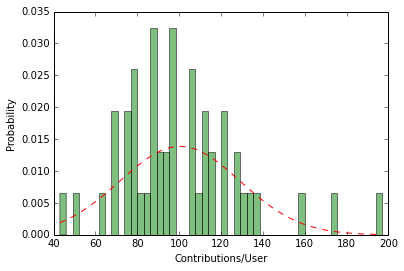

In [26]:
contributions = []

for user_id, user in users.iteritems():

    acc = 0
    for repo_id, contribs in user['contributions'].iteritems():
        acc += contribs
    
    contributions.append(acc)

n, bins, patches = plt.hist(contributions, 50, normed=1, facecolor='green', alpha=0.5)

mu = np.mean(contributions)
sigma = np.std(contributions)

y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, '--r')
plt.xlabel('Contributions/User')
plt.ylabel('Probability')
plt.show()

## Karma Distribution

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/mlab.py:716: RuntimeWarning: divide by zero encountered in double_scalars
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/mlab.py:716: RuntimeWarning: invalid value encountered in multiply
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)


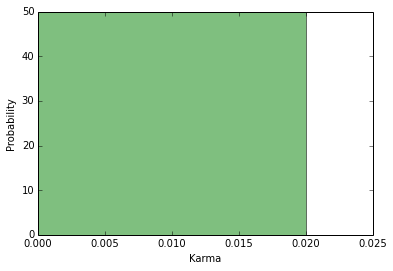

In [22]:
karmas = []

for user_id, user in users.iteritems():
    karmas.append(user['karma'])

n, bins, patches = plt.hist(karmas, 50, normed=1, facecolor='green', alpha=0.5)

mu = np.mean(karmas)
sigma = np.std(karmas)

y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, '--r')
plt.xlabel('Karma')
plt.ylabel('Probability')
plt.show()

## Score Distribution

In [ ]:
scores = []

for user_id, user in users.iteritems():
    scores.append(user['score'])

n, bins, patches = plt.hist(scores, 50, normed=1, facecolor='green', alpha=0.5)

mu = np.mean(scores)
sigma = np.std(scores)

y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, '--r')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.show()

# 